[1] "/home/jianj0c/dataset/redsea//home/jianj0c/dataset/redsea/"

In [43]:
####
library(ncdf4)
library(ggplot2)

database <- '/home/jianj0c/dataset/redsea/'

k490_freq_1_folder <- 'K490/Daily_Aqua_MODIS_Subsetted_K490_Over_Red_Sea_nc_files/'
k490_freq_8_folder <- 'K490/Aqua_MODIS_Subsetted_K490_8_Days_CompositeOver_Red_Sea_nc_files/'
k490_freq_30_folder  <- 'K490/Monthly_mean_k490/'

sst_freq_1_folder <- 'SST/Aqua_MODIS_1_Day_L3m_4km_SST/'
sst_freq_8_folder <- 'SST/Aqua_MODIS_8_days_L3m_4km_SST/'
sst_freq_30_folder  <- 'SST/Aqua_MODIS_monthly_L3m_4km_SST/'

chl_freq_1_folder  <- 'Chlorophyll/Daily/'
chl_freq_8_folder  <- 'Chlorophyll/8-Days_composite/'
chl_freq_30_folder  <- 'Chlorophyll/Monthly/'


data description

In [80]:
for(file in list(k490_freq_1_folder, k490_freq_8_folder,k490_freq_30_folder)){

    dir_path <- paste(database,file,sep="")
    nc_obj <- nc_open(paste(database,file,dir(dir_path)[1],sep=""))
    print(nc_obj)
}

File /home/jianj0c/dataset/redsea/K490/Daily_Aqua_MODIS_Subsetted_K490_Over_Red_Sea_nc_files/Daily_MODIS_k490.2003.nc (NC_FORMAT_CLASSIC):

     2 variables (excluding dimension variables):
        float k490[longitude,latitude,time]   
            units: m-1
            _FillValue: -1.17549402418441e+38
            long_name: Diffuse Attenuation Coefficient K490
            grid_mapping: crs
        int crs[]   
            crs_wkt: GEOGCRS["WGS 84",    DATUM["World Geodetic System 1984",        ELLIPSOID["WGS 84",6378137,298.257223563,            LENGTHUNIT["metre",1]]],    PRIMEM["Greenwich",0,        ANGLEUNIT["degree",0.0174532925199433]],    CS[ellipsoidal,2],        AXIS["geodetic latitude (Lat)",north,            ORDER[1],            ANGLEUNIT["degree",0.0174532925199433]],        AXIS["geodetic longitude (Lon)",east,            ORDER[2],            ANGLEUNIT["degree",0.0174532925199433]],    ID["EPSG",4326]]
            spatial_ref: GEOGCRS["WGS 84",    DATUM["World Geodetic S

In [78]:
for(file in list(sst_freq_1_folder, sst_freq_8_folder,sst_freq_30_folder)){

    dir_path <- paste(database,file,sep="")
    nc_obj <- nc_open(paste(database,file,dir(dir_path)[1],sep=""))
    print(nc_obj)
}

File /home/jianj0c/dataset/redsea/SST/Aqua_MODIS_1_Day_L3m_4km_SST/Aqua_MODIS_sstd_1day.2003_2012.nc (NC_FORMAT_CLASSIC):

     2 variables (excluding dimension variables):
        float sstMasked[longitude,latitude,time]   
            units: degree_C
            _FillValue: -1.17549402418441e+38
            long_name: sea_surface_temperature
            grid_mapping: crs
        int crs[]   
            crs_wkt: GEOGCRS["WGS 84",    DATUM["World Geodetic System 1984",        ELLIPSOID["WGS 84",6378137,298.257223563,            LENGTHUNIT["metre",1]],        ID["EPSG",6326]],    PRIMEM["Greenwich",0,        ANGLEUNIT["degree",0.0174532925199433],        ID["EPSG",8901]],    CS[ellipsoidal,2],        AXIS["longitude",east,            ORDER[1],            ANGLEUNIT["degree",0.0174532925199433,                ID["EPSG",9122]]],        AXIS["latitude",north,            ORDER[2],            ANGLEUNIT["degree",0.0174532925199433,                ID["EPSG",9122]]]]
            spatial_ref: GE

In [81]:
print.ncdf4(nc_obj)

ERROR: Error in print.ncdf4(nc_obj): could not find function "print.ncdf4"


In [79]:
for(file in list(chl_freq_1_folder, chl_freq_8_folder,chl_freq_30_folder)){

    dir_path <- paste(database,file,sep="")
    nc_obj <- nc_open(paste(database,file,dir(dir_path)[1],sep=""))
    print(nc_obj)
}

File /home/jianj0c/dataset/redsea/Chlorophyll/Daily/Daily_Aqua_MODIS_chloA.2003_2012.nc (NC_FORMAT_CLASSIC):

     2 variables (excluding dimension variables):
        float chlorophyllA[longitude,latitude,time]   
            units: mg m-3
            _FillValue: -1.17549402418441e+38
            long_name: Mean Chlorophyll a Concentration
            grid_mapping: crs
        int crs[]   
            crs_wkt: GEOGCRS["WGS 84",    DATUM["World Geodetic System 1984",        ELLIPSOID["WGS 84",6378137,298.257223563,            LENGTHUNIT["metre",1]],        ID["EPSG",6326]],    PRIMEM["Greenwich",0,        ANGLEUNIT["degree",0.0174532925199433],        ID["EPSG",8901]],    CS[ellipsoidal,2],        AXIS["longitude",east,            ORDER[1],            ANGLEUNIT["degree",0.0174532925199433,                ID["EPSG",9122]]],        AXIS["latitude",north,            ORDER[2],            ANGLEUNIT["degree",0.0174532925199433,                ID["EPSG",9122]]]]
            spatial_ref: GEOGC

In [73]:
dir(dir_path)[1]

[1] "Daily_MODIS_k490.2003.nc"

In [27]:
for (okok in c){
    print(okok)

}

[1] "../../dataset/redsea/K490/Aqua_MODIS_Subsetted_K490_8_Days_CompositeOver_Red_Sea_nc_files/MODIS_k490.2003.nc"
[1] "../../dataset/redsea/K490/Daily_Aqua_MODIS_Subsetted_K490_Over_Red_Sea_nc_files/Daily_MODIS_k490.2003.nc"
[1] "../../dataset/redsea/K490/Monthly_mean_k490/Monthly_Aqua_MODIS_k490_Red_Sea.nc"


In [15]:
data <- nc_open(data_set_path,verbose = FALSE)
# nc_close(data), nc_sync(data) flush in to disk
print(data)

File ../../dataset/redsea/K490/Aqua_MODIS_Subsetted_K490_8_Days_CompositeOver_Red_Sea_nc_files/MODIS_k490.2003.nc (NC_FORMAT_CLASSIC):

     2 variables (excluding dimension variables):
        float k490[longitude,latitude,time]   
            units: m-1
            _FillValue: -1.17549402418441e+38
            long_name: Diffuse Attenuation Coefficient K490
            grid_mapping: crs
        int crs[]   
            crs_wkt: GEOGCRS["WGS 84",    DATUM["World Geodetic System 1984",        ELLIPSOID["WGS 84",6378137,298.257223563,            LENGTHUNIT["metre",1]]],    PRIMEM["Greenwich",0,        ANGLEUNIT["degree",0.0174532925199433]],    CS[ellipsoidal,2],        AXIS["geodetic latitude (Lat)",north,            ORDER[1],            ANGLEUNIT["degree",0.0174532925199433]],        AXIS["geodetic longitude (Lon)",east,            ORDER[2],            ANGLEUNIT["degree",0.0174532925199433]],    ID["EPSG",4326]]
            spatial_ref: GEOGCRS["WGS 84",    DATUM["World Geodetic Syste

File ../../dataset/redsea/K490/Aqua_MODIS_Subsetted_K490_8_Days_CompositeOver_Red_Sea_nc_files/MODIS_k490.2003.nc (NC_FORMAT_CLASSIC):

     2 variables (excluding dimension variables):
        float k490[longitude,latitude,time]   
            units: m-1
            _FillValue: -1.17549402418441e+38
            long_name: Diffuse Attenuation Coefficient K490
            grid_mapping: crs
        int crs[]   
            crs_wkt: GEOGCRS["WGS 84",    DATUM["World Geodetic System 1984",        ELLIPSOID["WGS 84",6378137,298.257223563,            LENGTHUNIT["metre",1]]],    PRIMEM["Greenwich",0,        ANGLEUNIT["degree",0.0174532925199433]],    CS[ellipsoidal,2],        AXIS["geodetic latitude (Lat)",north,            ORDER[1],            ANGLEUNIT["degree",0.0174532925199433]],        AXIS["geodetic longitude (Lon)",east,            ORDER[2],            ANGLEUNIT["degree",0.0174532925199433]],    ID["EPSG",4326]]
            spatial_ref: GEOGCRS["WGS 84",    DATUM["World Geodetic Syste

In [7]:
data

File ../../dataset/redsea/K490/Aqua_MODIS_Subsetted_K490_8_Days_CompositeOver_Red_Sea_nc_files/MODIS_k490.2003.nc (NC_FORMAT_CLASSIC):

     2 variables (excluding dimension variables):
        float k490[longitude,latitude,time]   
            units: m-1
            _FillValue: -1.17549402418441e+38
            long_name: Diffuse Attenuation Coefficient K490
            grid_mapping: crs
        int crs[]   
            crs_wkt: GEOGCRS["WGS 84",    DATUM["World Geodetic System 1984",        ELLIPSOID["WGS 84",6378137,298.257223563,            LENGTHUNIT["metre",1]]],    PRIMEM["Greenwich",0,        ANGLEUNIT["degree",0.0174532925199433]],    CS[ellipsoidal,2],        AXIS["geodetic latitude (Lat)",north,            ORDER[1],            ANGLEUNIT["degree",0.0174532925199433]],        AXIS["geodetic longitude (Lon)",east,            ORDER[2],            ANGLEUNIT["degree",0.0174532925199433]],    ID["EPSG",4326]]
            spatial_ref: GEOGCRS["WGS 84",    DATUM["World Geodetic Syste

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



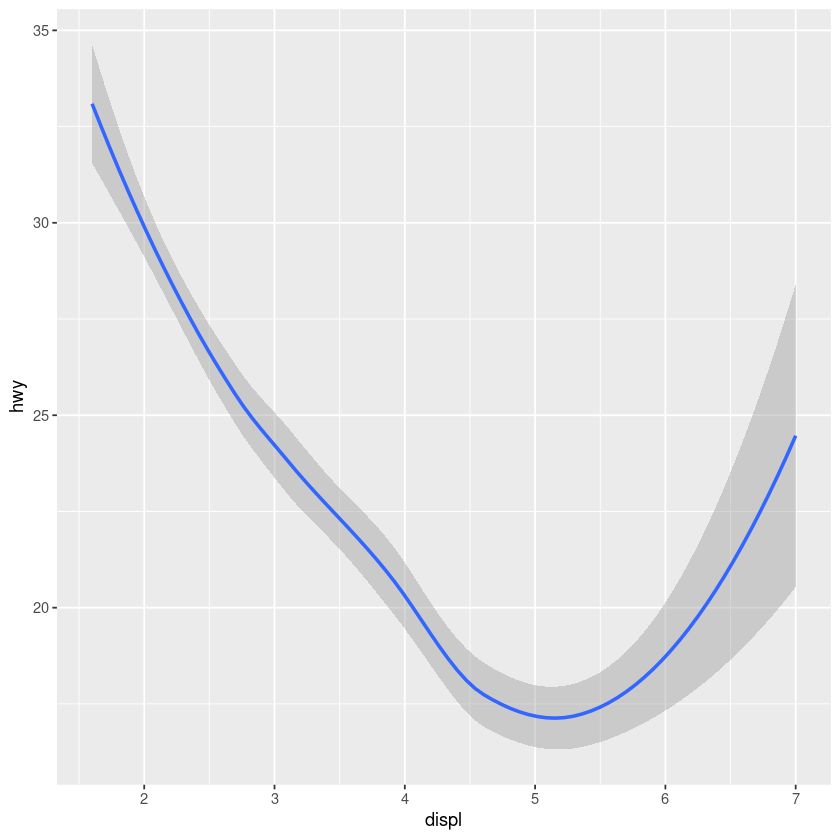

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



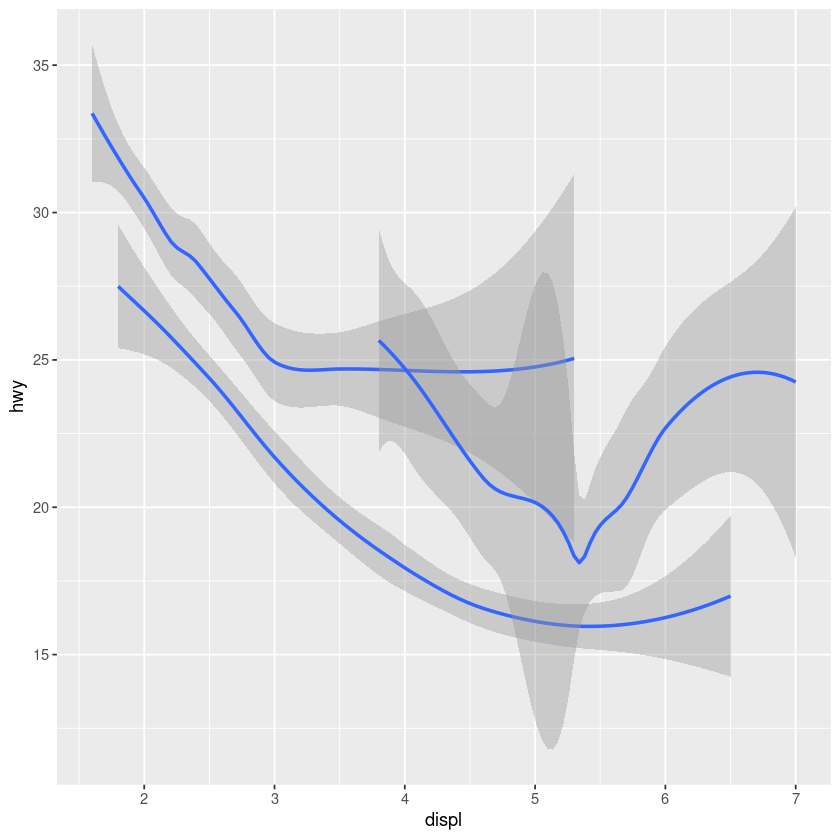

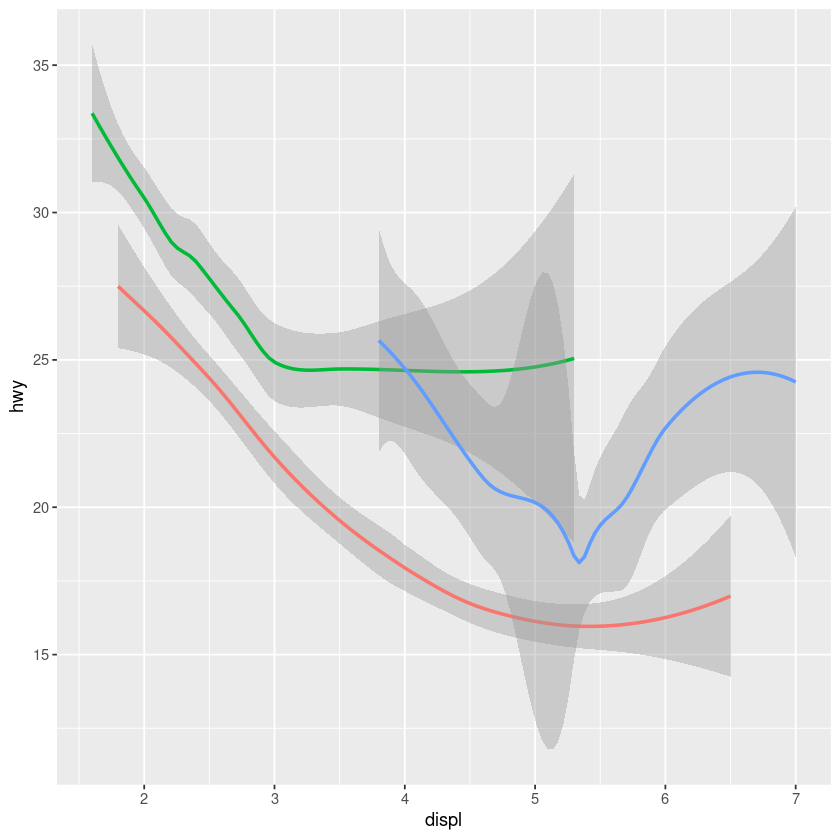

In [3]:
library(ggplot)
ggplot(data = mpg) +
 geom_smooth(mapping = aes(x = displ, y = hwy))
ggplot(data = mpg) +
 geom_smooth(mapping = aes(x = displ, y = hwy, group = drv))
ggplot(data = mpg) +
 geom_smooth(
 mapping = aes(x = displ, y = hwy, color = drv),
 show.legend = FALSE
 )
 a  <- 3

In [2]:
library(ggplot2)

In [10]:
dir(nc)

['Conventions',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__orthogonal_indexing__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_close',
 '_close_mem',
 '_enddef',
 '_getname',
 '_grpid',
 '_isopen',
 '_ncstring_attrs__',
 '_redef',
 'close',
 'cmptypes',
 'createCompoundType',
 'createDimension',
 'createEnumType',
 'createGroup',
 'createVLType',
 'createVariable',
 'created_by',
 'data_model',
 'date',
 'delncattr',
 'dimensions',
 'disk_format',
 'enumtypes',
 'file_format',
 'filepath',
 'fromcdl',
 'get_variables_by_attributes',
 'getncattr',
 'groups',
 'has_blosc_filter',
 'has_bzip2_filter',
 'has_szip_filter',
 'has_zstd_filter',
 'isopen',
 'keepweakref',
 'name',
 'ncattrs',
 

In [4]:
for var in nc.variables.keys():
    data=nc.variables[var][:].data
    print(var,data.shape)

longitude (268,)
latitude (423,)
time (890,)
chlorophyllA (890, 423, 268)
crs ()


In [7]:
#看出是逐时数据
import datetime
time=nc.variables['time'][:].data
print(time[:10])
for i in range(3):
    #tstamp=(time[i]-613608)*3600 #1900年1月1日零时距离1970年1月1日零时有613608个小时
    date= datetime.datetime.utcfromtimestamp(time[i])
    print (date.strftime("%Y-%m-%d %H:%M:%S"))


[1.0417248e+09 1.0424160e+09 1.0431072e+09 1.0437984e+09 1.0444896e+09
 1.0451808e+09 1.0458720e+09 1.0465632e+09 1.0472544e+09 1.0479456e+09]
2003-01-05 00:00:00
2003-01-13 00:00:00
2003-01-21 00:00:00


In [9]:
data=nc.variables['t2m'][:]
long= nc.variables['longitude'][:]  
lati= nc.variables['latitude'][:] 
plt.contourf(long,lati,data[116,:,:]-273) #转为摄氏度
plt.colorbar()

KeyError: 't2m'